# MBAN 6110 T Assignment1
# Yuntong Zhu
#Scenario:

You are a data analyst at an e-commerce company that sells a variety of products. Your company wants to better understand how various products perform across regions, in order to devise its sales strategy for next year.
You have been provided with data includes information about the product, the region where the product was sold, the price of the product, the number of units sold, and the date of the sale.
Your task is to clean the data as you see fit, and conduct exploratory analysis which will help the company build a sales strategy for the following year.
In addition to the analysis, be sure to answer the following questions:

1) What conclusions can you draw about sales performance of various products and regions?

2) What recommendations do you have for the business?

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/zoezhu/Desktop/sales_data.csv')
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
...,...,...,...,...,...
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10


In [2]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


In [3]:
df.head(10)

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
6,Product_31,Region_10,1.60,11.0,2022-01-07
7,NaN,NaN,NaN,11.0,2022-01-08
8,Product_20,Region_8,9.55,8.0,2022-01-09
9,Product_34,Region_1,58.88,NaN,2022-01-10


In [4]:
df.isnull().sum()

Product       103
Region        108
Price         105
Units Sold    107
Sale Date       0
dtype: int64

In [5]:
# Descriptive statistics
df.describe()

,Price,Units Sold
count,945.000000,943.000000
mean,108.628011,10.200424
std,167.350086,3.247589
min,0.190000,2.000000
25%,26.420000,8.000000
50%,64.640000,10.000000
75%,142.310000,12.000000
max,2636.900000,22.000000


1.Data clean

In [6]:
# Drop missing data,can make data more clearly.
df.dropna(subset='Price',inplace=True)
df.dropna(subset='Units Sold',inplace=True)
df.dropna(subset='Product',inplace=True)
df.dropna(subset='Region',inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
#Fill in empty categorie
df['Product'] = df['Product'].fillna("Other")
df['Region'] = df['Region'].fillna("Other")
df['Price'] = df['Price'].fillna(df.groupby('Product')['Price'].transform('median'))
df['Units Sold'] = df['Units Sold'].fillna(df.groupby('Product')['Units Sold'].transform('median'))


In [10]:
# Add new column,can get the total sale amount
df["Sale"] = df["Price"] * df["Units Sold"]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 1 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     653 non-null    object 
 1   Region      653 non-null    object 
 2   Price       653 non-null    float64
 3   Units Sold  653 non-null    float64
 4   Sale Date   653 non-null    object 
 5   Sale        653 non-null    float64
dtypes: float64(3), object(3)
memory usage: 35.7+ KB


2. Data Analysis

In [12]:
df2 = df.sort_values(['Product','Sale'], ascending=True, ignore_index=True)
print(df2)

       Product     Region   Price  Units Sold   Sale Date     Sale
0    Product_1   Region_4    7.97         9.0  2022-05-17    71.73
1    Product_1   Region_2   13.38         6.0  2024-01-02    80.28
2    Product_1   Region_5   20.43         9.0  2022-09-11   183.87
3    Product_1   Region_6   42.74        11.0  2023-06-07   470.14
4    Product_1   Region_7   79.99         6.0  2024-03-18   479.94
..         ...        ...     ...         ...         ...      ...
648  Product_9   Region_9   76.01        11.0  2023-09-28   836.11
649  Product_9  Region_10  173.12         5.0  2023-11-22   865.60
650  Product_9   Region_2   90.49        12.0  2023-09-25  1085.88
651  Product_9   Region_5  113.06        14.0  2024-03-07  1582.84
652  Product_9   Region_8  282.73        12.0  2022-01-25  3392.76

[653 rows x 6 columns]


In [13]:
df2.sort_index(axis=0, ascending=True) 

,Product,Region,Price,Units Sold,Sale Date,Sale
0,Product_1,Region_4,7.97,9.0,2022-05-17,71.73
1,Product_1,Region_2,13.38,6.0,2024-01-02,80.28
2,Product_1,Region_5,20.43,9.0,2022-09-11,183.87
3,Product_1,Region_6,42.74,11.0,2023-06-07,470.14
4,Product_1,Region_7,79.99,6.0,2024-03-18,479.94
...,...,...,...,...,...,...
648,Product_9,Region_9,76.01,11.0,2023-09-28,836.11
649,Product_9,Region_10,173.12,5.0,2023-11-22,865.60
650,Product_9,Region_2,90.49,12.0,2023-09-25,1085.88
651,Product_9,Region_5,113.06,14.0,2024-03-07,1582.84


In [14]:
# clean data 
df2.isnull().sum()

Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
Sale          0
dtype: int64

In [15]:
df2.isnull().any()

Product       False
Region        False
Price         False
Units Sold    False
Sale Date     False
Sale          False
dtype: bool

In [16]:
df2['Product'].unique()

array(['Product_1', 'Product_10', 'Product_11', 'Product_12',
       'Product_13', 'Product_14', 'Product_15', 'Product_16',
       'Product_17', 'Product_18', 'Product_19', 'Product_2',
       'Product_20', 'Product_21', 'Product_22', 'Product_23',
       'Product_24', 'Product_25', 'Product_26', 'Product_27',
       'Product_28', 'Product_29', 'Product_3', 'Product_30',
       'Product_31', 'Product_32', 'Product_33', 'Product_34',
       'Product_35', 'Product_36', 'Product_37', 'Product_38',
       'Product_39', 'Product_4', 'Product_40', 'Product_41',
       'Product_42', 'Product_43', 'Product_44', 'Product_45',
       'Product_46', 'Product_47', 'Product_48', 'Product_49',
       'Product_5', 'Product_50', 'Product_6', 'Product_7', 'Product_8',
       'Product_9'], dtype=object)

In [17]:
Region_Units_Sold = df2.groupby('Region')['Units Sold'].sum().head(10).sort_values(ascending=False)
print(Region_Units_Sold)

Region
Region_5     818.0
Region_2     715.0
Region_9     700.0
Region_7     699.0
Region_8     693.0
Region_10    640.0
Region_1     623.0
Region_6     610.0
Region_4     607.0
Region_3     576.0
Name: Units Sold, dtype: float64


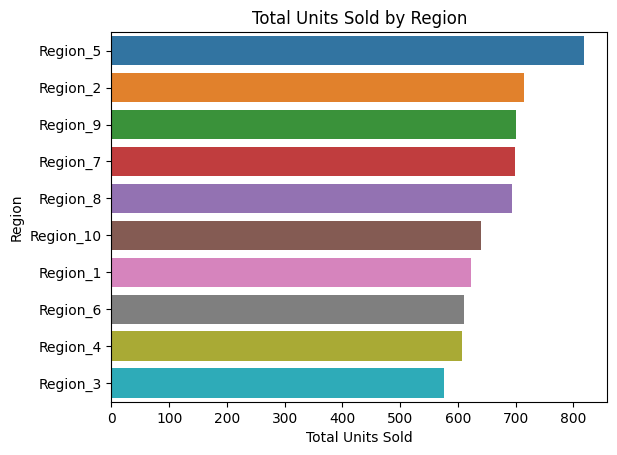

In [18]:
sns.barplot(x=Region_Units_Sold.values, y=Region_Units_Sold.index, orient='horizontal')
plt.xlabel('Total Units Sold')
plt.ylabel('Region')
plt.title('Total Units Sold by Region')
plt.show()

In [19]:
Region_Sale = df2.groupby('Region')['Sale'].sum().head(10).sort_values(ascending=False)
print(Region_Sale)

Region
Region_2     105014.03
Region_5      84648.30
Region_8      83758.45
Region_6      72892.36
Region_10     72426.90
Region_7      68257.50
Region_9      65366.13
Region_1      63016.40
Region_4      56343.54
Region_3      53133.80
Name: Sale, dtype: float64


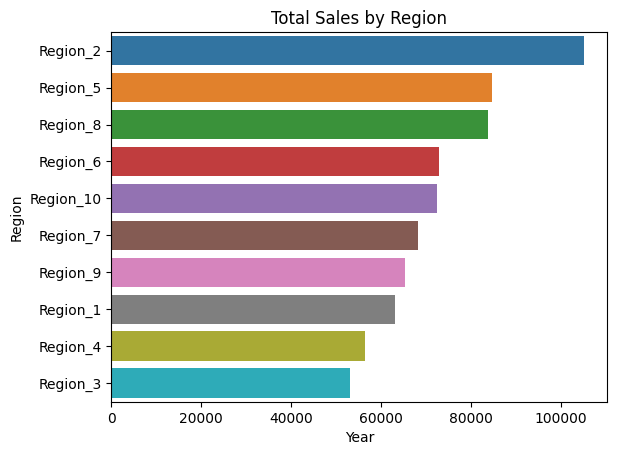

In [20]:
sns.barplot(x=Region_Sale.values, y=Region_Sale.index, orient='horizontal')
plt.xlabel('Year')
plt.ylabel('Region')
plt.title('Total Sales by Region')
plt.show()

In [21]:
Product_Units_Sold = df2.groupby('Product')['Units Sold'].sum().head(10).sort_values(ascending=False)
print(Product_Units_Sold)

Product
Product_15    185.0
Product_10    154.0
Product_13    154.0
Product_1     142.0
Product_17    133.0
Product_12    122.0
Product_11    114.0
Product_16    109.0
Product_18    100.0
Product_14     98.0
Name: Units Sold, dtype: float64


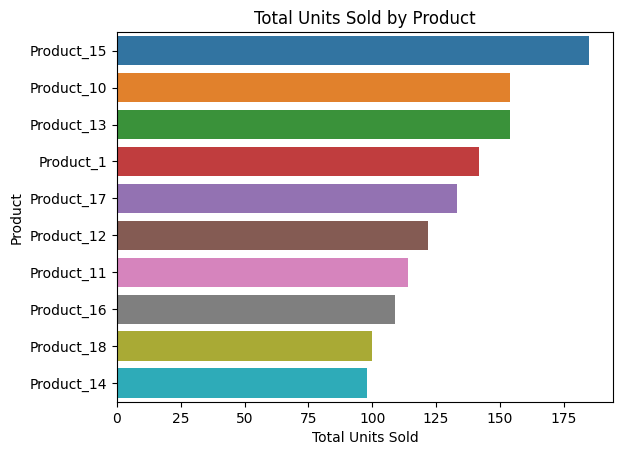

In [22]:
sns.barplot(x=Product_Units_Sold.values, y=Product_Units_Sold.index, orient='horizontal')
plt.xlabel('Total Units Sold')
plt.ylabel('Product')
plt.title('Total Units Sold by Product')
plt.show()

In [23]:
Product_Sale = df2.groupby('Product')['Sale'].sum().head(10).sort_values(ascending=False)
print(Product_Sale)

Product
Product_10    17379.50
Product_15    17168.71
Product_13    16349.31
Product_17    14806.21
Product_1     13353.49
Product_18    12630.18
Product_14    12337.86
Product_12    12158.03
Product_11    10614.82
Product_16     6585.22
Name: Sale, dtype: float64


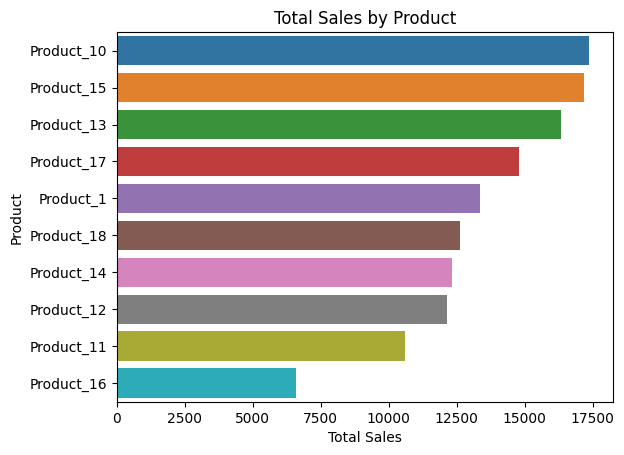

In [24]:
sns.barplot(x=Product_Sale.values, y=Product_Sale.index, orient='horizontal')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Total Sales by Product')
plt.show()

In [25]:
df2['Year'] = df2['Sale Date'].str[0:4].sort_values(ascending=False)
df2

,Product,Region,Price,Units Sold,Sale Date,Sale,Year
0,Product_1,Region_4,7.97,9.0,2022-05-17,71.73,2022
1,Product_1,Region_2,13.38,6.0,2024-01-02,80.28,2024
2,Product_1,Region_5,20.43,9.0,2022-09-11,183.87,2022
3,Product_1,Region_6,42.74,11.0,2023-06-07,470.14,2023
4,Product_1,Region_7,79.99,6.0,2024-03-18,479.94,2024
...,...,...,...,...,...,...,...
648,Product_9,Region_9,76.01,11.0,2023-09-28,836.11,2023
649,Product_9,Region_10,173.12,5.0,2023-11-22,865.60,2023
650,Product_9,Region_2,90.49,12.0,2023-09-25,1085.88,2023
651,Product_9,Region_5,113.06,14.0,2024-03-07,1582.84,2024


In [26]:
df2.groupby(['Region','Product'])['Sale'].sum().sort_values(ascending=False)

Region     Product   
Region_2   Product_34    38341.30
Region_8   Product_49    18144.00
Region_7   Product_27    16160.78
Region_10  Product_7      9215.83
Region_6   Product_20     7548.89
                           ...   
Region_9   Product_25       25.48
Region_10  Product_31       17.60
Region_9   Product_8         4.86
Region_6   Product_46        4.26
Region_9   Product_36        2.97
Name: Sale, Length: 366, dtype: float64

In [27]:
average_sales = df2.groupby(['Region', 'Product'])['Sale'].mean().sort_values(ascending=False)
print(average_sales)

Region     Product   
Region_2   Product_34    19170.65
Region_8   Product_49    18144.00
Region_7   Product_27     8080.39
Region_4   Product_21     6851.60
Region_6   Product_10     3928.80
                           ...   
Region_9   Product_25       25.48
Region_10  Product_31       17.60
Region_9   Product_8         4.86
Region_6   Product_46        4.26
Region_9   Product_36        2.97
Name: Sale, Length: 366, dtype: float64


In [28]:
max_sales = df2.groupby(['Region', 'Product'])['Sale'].max().sort_values(ascending=False)
print(max_sales)

Region     Product   
Region_2   Product_34    36916.60
Region_8   Product_49    18144.00
Region_7   Product_27    16145.10
Region_10  Product_7      8526.69
Region_1   Product_14     7044.75
                           ...   
Region_9   Product_25       25.48
Region_10  Product_31       17.60
Region_9   Product_8         4.86
Region_6   Product_46        4.26
Region_9   Product_36        2.97
Name: Sale, Length: 366, dtype: float64


In [29]:
sales_count = df2.groupby(['Region', 'Product'])['Sale'].count().sort_values(ascending=False)
print(sales_count)

Region    Product   
Region_7  Product_3     5
Region_2  Product_49    5
Region_8  Product_10    4
Region_2  Product_48    4
Region_4  Product_36    4
                       ..
          Product_28    1
          Product_29    1
          Product_3     1
          Product_31    1
Region_9  Product_9     1
Name: Sale, Length: 366, dtype: int64


1) What conclusions can you draw about sales performance of various products and regions?

2) What recommendations do you have for the business?

 

Question1.
From the data, we can see that Product_34 in Region_2 has the highest sales volume among all regions at 36916.60 per year. The average sales in each region is also the highest for Product_34 in Region_2 at 19170.65. Although it is the highest sales, Product_3 in Region_7 and Product_49 in Region_2 are the highest in the number of products sold with 5. Also, Product_9 in Region_9，sales amount is only 1, and Region_9's Product_36 total sales are also the lowest.

In conclusion,For region,which with the highest total units sold is Region_5, followed by Region_2 and Region_9.Also,The region with the highest total sales is Region_2, followed by Region_5 and Region_8. For Product,that with the highest number of units sold is Product_15, followed by Product_10 and Product_13. For Frequency, that Region_7 and Region_2 have the highest frequency of Product_3 and Product_4.


In [30]:
df2.head(10)

,Product,Region,Price,Units Sold,Sale Date,Sale,Year
0,Product_1,Region_4,7.97,9.0,2022-05-17,71.73,2022
1,Product_1,Region_2,13.38,6.0,2024-01-02,80.28,2024
2,Product_1,Region_5,20.43,9.0,2022-09-11,183.87,2022
3,Product_1,Region_6,42.74,11.0,2023-06-07,470.14,2023
4,Product_1,Region_7,79.99,6.0,2024-03-18,479.94,2024
5,Product_1,Region_7,62.99,13.0,2022-10-28,818.87,2022
6,Product_1,Region_8,75.88,12.0,2023-11-15,910.56,2023
7,Product_1,Region_6,82.88,11.0,2024-06-07,911.68,2024
8,Product_1,Region_10,100.23,11.0,2023-09-02,1102.53,2023
9,Product_1,Region_8,107.34,11.0,2024-03-14,1180.74,2024


In [31]:
df2['Sale'].describe()

count      653.000000
mean      1110.041975
std       1994.641994
min          1.750000
25%        270.530000
50%        610.350000
75%       1352.100000
max      36916.600000
Name: Sale, dtype: float64

In [32]:
df2['Year'].describe()

count      653
unique       3
top       2022
freq       234
Name: Year, dtype: object

In [33]:
df2.isnull().sum()

Product       0
Region        0
Price         0
Units Sold    0
Sale Date     0
Sale          0
Year          0
dtype: int64

In [34]:
# Sort the highest purchased products 
highest_purchased_products = df2.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

print(highest_purchased_products)


Product
Product_24    242.0
Product_4     206.0
Product_40    197.0
Product_49    188.0
Product_8     186.0
Product_15    185.0
Product_43    179.0
Product_7     169.0
Product_37    167.0
Product_27    157.0
Product_13    154.0
Product_10    154.0
Product_23    152.0
Product_50    151.0
Product_42    148.0
Product_3     148.0
Product_34    148.0
Product_19    142.0
Product_1     142.0
Product_2     137.0
Product_21    135.0
Product_26    135.0
Product_38    135.0
Product_17    133.0
Product_9     131.0
Product_46    128.0
Product_45    125.0
Product_48    125.0
Product_12    122.0
Product_22    122.0
Product_29    121.0
Product_36    120.0
Product_28    120.0
Product_30    115.0
Product_11    114.0
Product_33    111.0
Product_16    109.0
Product_41    109.0
Product_20    107.0
Product_32    103.0
Product_6     103.0
Product_25    101.0
Product_18    100.0
Product_35     99.0
Product_31     99.0
Product_14     98.0
Product_47     80.0
Product_5      80.0
Product_44     80.0
Product_39  

In [35]:
#df2['Year'] will contain the first four characters of the 'Sale Date' column as a string.We convert it to integers using .astype(int)
df2['Year'] = df2['Sale Date'].str[:4].astype(int)
df2['Year'].unique()
N2022 = df2[df2['Year'] == 2022]
N2023 = df2[df2['Year'] == 2023]
N2024 = df2[df2['Year'] == 2024]

N2022


,Product,Region,Price,Units Sold,Sale Date,Sale,Year
0,Product_1,Region_4,7.97,9.0,2022-05-17,71.73,2022
2,Product_1,Region_5,20.43,9.0,2022-09-11,183.87,2022
5,Product_1,Region_7,62.99,13.0,2022-10-28,818.87,2022
10,Product_1,Region_3,72.55,17.0,2022-03-25,1233.35,2022
11,Product_1,Region_1,125.89,13.0,2022-09-16,1636.57,2022
...,...,...,...,...,...,...,...
639,Product_8,Region_8,433.54,9.0,2022-08-21,3901.86,2022
645,Product_9,Region_3,14.40,10.0,2022-05-19,144.00,2022
646,Product_9,Region_6,44.34,10.0,2022-07-02,443.40,2022
647,Product_9,Region_3,37.30,14.0,2022-08-10,522.20,2022


In [36]:
N2023


,Product,Region,Price,Units Sold,Sale Date,Sale,Year
3,Product_1,Region_6,42.74,11.0,2023-06-07,470.14,2023
6,Product_1,Region_8,75.88,12.0,2023-11-15,910.56,2023
8,Product_1,Region_10,100.23,11.0,2023-09-02,1102.53,2023
12,Product_1,Region_4,328.71,13.0,2023-10-14,4273.23,2023
13,Product_10,Region_2,3.63,15.0,2023-10-02,54.45,2023
...,...,...,...,...,...,...,...
640,Product_9,Region_2,1.49,12.0,2023-10-29,17.88,2023
643,Product_9,Region_5,12.59,6.0,2023-12-16,75.54,2023
648,Product_9,Region_9,76.01,11.0,2023-09-28,836.11,2023
649,Product_9,Region_10,173.12,5.0,2023-11-22,865.60,2023


In [1037]:
N2024

,Product,Region,Price,Units Sold,Sale Date,Sale,Year
1,Product_1,Region_2,13.38,6.0,2024-01-02,80.28,2024
4,Product_1,Region_7,79.99,6.0,2024-03-18,479.94,2024
7,Product_1,Region_6,82.88,11.0,2024-06-07,911.68,2024
9,Product_1,Region_8,107.34,11.0,2024-03-14,1180.74,2024
15,Product_10,Region_5,58.50,4.0,2024-09-05,234.00,2024
...,...,...,...,...,...,...,...
634,Product_8,Region_4,67.62,12.0,2024-09-17,811.44,2024
641,Product_9,Region_3,7.98,7.0,2024-06-25,55.86,2024
642,Product_9,Region_10,7.01,8.0,2024-09-16,56.08,2024
644,Product_9,Region_8,9.71,10.0,2024-04-18,97.10,2024


In [1038]:
# Add new category to combine Year and Sale
Years = df2.groupby('Year')['Sale'].sum()
Years

Year
2022    246038.05
2023    291588.66
2024    187230.70
Name: Sale, dtype: float64

In [1039]:
df3 = df2[['Product', 'Price','Sale', 'Units Sold','Year']]
df3

,Product,Price,Sale,Units Sold,Year
0,Product_1,7.97,71.73,9.0,2022
1,Product_1,13.38,80.28,6.0,2024
2,Product_1,20.43,183.87,9.0,2022
3,Product_1,42.74,470.14,11.0,2023
4,Product_1,79.99,479.94,6.0,2024
...,...,...,...,...,...
648,Product_9,76.01,836.11,11.0,2023
649,Product_9,173.12,865.60,5.0,2023
650,Product_9,90.49,1085.88,12.0,2023
651,Product_9,113.06,1582.84,14.0,2024


In [1040]:
# Find the highest sale revenue to analysis which product is best seller product
df3s = pd.DataFrame(df3.groupby('Product')['Sale'].sum()).sort_values(by='Sale', ascending=False)
df3s

,Sale
Product,
Product_34,51104.95
Product_49,36078.37
Product_27,32643.87
Product_50,25149.37
Product_7,23290.75
Product_23,22203.34
Product_40,21451.46
Product_19,20210.79
Product_22,18989.90


In [1041]:
df3s.describe()

,Sale
count,50.000000
mean,14497.148200
std,8234.990031
min,5047.080000
25%,9095.277500
50%,12611.760000
75%,16280.407500
max,51104.950000


In [1042]:
# Best sells product
df3s[df3s['Sale'] == 51104.950000]

,Sale
Product,
Product_34,51104.95


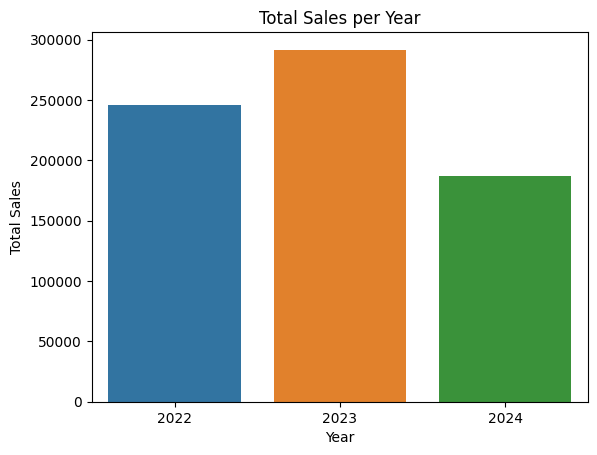

In [1043]:
each_year_sales = df2.groupby('Year')['Sale'].sum()

# Create a bar plot for each year
sns.barplot(x=each_year_sales.index, y=each_year_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales per Year')
plt.show()

In [50]:
# Find which quarter has highest sale
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')
df2['Year'] = df2['Year'].dt.year

def get_quarter(month):
    if 1 <= month <= 3:
        return 'Q1'
    elif 4 <= month <= 6:
        return 'Q2'
    elif 7 <= month <= 9:
        return 'Q3'
    else:
        return 'Q4'

# Create a new column
df2['Quarter'] = pd.to_datetime(df2['Year']).dt.quarter.apply(get_quarter)

In [1053]:
df2 = pd.DataFrame(df2.groupby('Quarter')['Sale'].max()).head()
df2

,Sale
Quarter,
Q1,36916.6


In [1048]:
df3.groupby('Year')['Sale'].sum()

Year
2022    246038.05
2023    291588.66
2024    187230.70
Name: Sale, dtype: float64

Question2.

From the annual table, we can see that in 2023 total sale is the best performing year, the highest selling product is Product_34 with sales of 51104.95. The lowest selling product is Product_35 with sales of 5047.08. Another, based on the analysis of the quarterly table, we can see that the best performance in the last three years is in Quarter 1, between January and March, is the peak season for sales of products.

The recommendation for the business is that although there is a huge increase in sales in 2023 compared to 2022, there is a decrease in sales compared to 2024. What can be done now is to explore customer segmentation based on customer preference, buying behavior or region. Tailor marketing and sales strategies, and sell the right products in the right season.

The company needs to change its strategy and reduce or eliminate as many unpopular products as possible in order to maintain its long-term growth goals.
